In [1]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('../..')

from code_utils.path_conf import etri_path, interim_etri_path, processed_etri_path
from code_utils.utils.dataframes import split_by_day

import pandas as pd

## Metadata files

In [2]:
df_user_info = (
    pd.read_csv(etri_path / "user_info_2020.csv")
    .sort_values("userId")
    .reset_index(drop=True)
)
display(df_user_info)
df_user_sleep = pd.read_csv(etri_path / "user_sleep_2020.csv")
display(df_user_sleep.info())
display(df_user_sleep.head())
df_user_survey = pd.read_csv(etri_path / "user_survey_2020.csv")
display(df_user_survey.info())
display(df_user_survey.head())


,userId,gender,age,handed,height,weight,startDt,endDt
0,user01,M,27,Left,167,76,2020-08-30,2020-09-27
1,user02,F,25,Left,168,81,2020-08-31,2020-09-27
2,user03,F,32,Right,166,62,2020-08-29,2020-09-27
3,user04,M,28,Right,171,70,2020-08-31,2020-09-27
4,user05,M,31,Right,177,75,2020-08-31,2020-09-27
5,user06,F,22,Right,164,70,2020-09-11,2020-10-08
6,user07,M,30,Right,173,83,2020-08-31,2020-09-27
7,user08,M,32,Right,180,84,2020-08-31,2020-09-25
8,user09,M,20,Right,170,80,2020-08-31,2020-09-27
9,user10,M,25,Right,184,77,2020-08-30,2020-09-27


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 23 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   userId                            615 non-null    object
 1   timezone                          615 non-null    object
 2   date                              615 non-null    object
 3   startDt                           615 non-null    int64 
 4   endDt                             615 non-null    int64 
 5   lastUpdate                        615 non-null    int64 
 6   wakeupduration                    615 non-null    int64 
 7   lightsleepduration                615 non-null    int64 
 8   deepsleepduration                 615 non-null    int64 
 9   wakeupcount                       615 non-null    int64 
 10  durationtosleep                   615 non-null    int64 
 11  remsleepduration                  615 non-null    int64 
 12  durationtowakeup      

None

,userId,timezone,date,startDt,endDt,lastUpdate,wakeupduration,lightsleepduration,deepsleepduration,wakeupcount,...,hr_average,hr_min,hr_max,rr_average,rr_min,rr_max,breathing_disturbances_intensity,snoring,snoringepisodecount,sleep_score
0,user24,Asia/Seoul,2020-08-30,1598708760,1598740860,1598748252,3840,13800,9000,3,...,72,63,82,15,10,20,10,840,1,86
1,user24,Asia/Seoul,2020-08-31,1598800140,1598825940,1598833333,4740,9540,6360,1,...,69,60,82,15,11,20,8,2700,3,52
2,user24,Asia/Seoul,2020-09-01,1598885940,1598908800,1598916190,1920,8760,4740,1,...,70,58,94,15,12,23,8,0,0,61
3,user24,Asia/Seoul,2020-09-02,1598979420,1598999580,1599006969,2760,7740,7440,1,...,68,60,80,15,12,19,-1,240,1,40
4,user24,Asia/Seoul,2020-09-03,1599060780,1599085980,1599093370,3900,11640,7620,1,...,71,61,83,15,11,25,7,300,1,55


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1230 entries, 0 to 1229
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   userId        1230 non-null   object 
 1   date          1230 non-null   object 
 2   amPm          1230 non-null   object 
 3   startInput    1230 non-null   object 
 4   endInput      1230 non-null   object 
 5   sleep         615 non-null    float64
 6   sleepProblem  615 non-null    float64
 7   dream         615 non-null    float64
 8   amCondition   615 non-null    float64
 9   amEmotion     615 non-null    float64
 10  pmEmotion     615 non-null    float64
 11  pmStress      615 non-null    float64
 12  pmFatigue     615 non-null    float64
 13  caffeine      282 non-null    object 
 14  cAmount(ml)   282 non-null    float64
 15  alcohol       114 non-null    object 
 16  aAmount(ml)   113 non-null    float64
dtypes: float64(10), object(7)
memory usage: 163.5+ KB


None

,userId,date,amPm,startInput,endInput,sleep,sleepProblem,dream,amCondition,amEmotion,pmEmotion,pmStress,pmFatigue,caffeine,cAmount(ml),alcohol,aAmount(ml)
0,user24,2020-08-29,am,2020-08-29 21:23,2020-08-29 21:23,4.0,0.0,3.0,3.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,user24,2020-08-29,pm,2020-08-29 21:23,2020-08-29 21:23,NaN,NaN,NaN,NaN,NaN,4.0,4.0,2.0,NaN,NaN,NaN,NaN
2,user24,2020-08-30,am,2020-08-30 7:41,2020-08-30 7:41,3.0,2.0,2.0,2.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,user24,2020-08-30,pm,2020-08-30 22:43,2020-08-30 22:43,NaN,NaN,NaN,NaN,NaN,4.0,5.0,2.0,coffee,200.0,NaN,NaN
4,user24,2020-08-31,am,2020-08-31 7:23,2020-08-31 7:24,3.0,2.0,2.0,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df_user_sleep["timezone"].unique()


array(['Asia/Seoul'], dtype=object)

## Parsing the raw sensor data files

In [4]:
# set the dtypes of the sensors
sensor_dtype_mapping_dict = {
    "e4Acc": {"x": "float32", "y": "float32", "z": "float32"},
    "e4Bvp": {"value": "float32"},
    "e4Eda": {"eda": "float32"},
    "e4Hr": {"hr": "float32"},
    "e4Temp": {"temp": "float32"},
    "mAcc": {"x": "float32", "y": "float32", "z": "float32"},
    "mGps": {"lat": "float32", "long": "float32", "accuracy": "float32"},
    "mGyr": {k: "float32" for k in ["x", "y", "z", "roll", "pitch", "yaw"]},
    "mMag": {k: "float32" for k in ["x", "y", "z"]},
}

# rename some sensor columns
sensor_rename_mapping_dict = {"e4Bvp": {"value": "bvp"}}

# the dtypes of the label csv
label_dtype_mapping_dict = {
    "action": "category",
    "actionSub": "category",
    "actionSubOption": "int",
    # TODO
}


In [5]:
from __future__ import annotations
from pathlib import Path
from tqdm.auto import tqdm

def process_etri_sensor_csv(sensor_csv_path: Path, tz_str: str = 'Asia/Seoul') -> pd.DataFrame:
    ts = pd.Timestamp(int(sensor_csv_path.stem), unit='s', tz=tz_str)
    sensor_type = sensor_csv_path.parent.stem
    sensor_dict = sensor_dtype_mapping_dict[sensor_type]
    df_sensor = pd.read_csv(sensor_csv_path, dtype=sensor_dict)
    df_sensor['timestamp'] = ts + pd.to_timedelta(df_sensor['timestamp'], unit='s')
    if sensor_type in sensor_rename_mapping_dict:
        df_sensor = df_sensor.rename(columns=sensor_rename_mapping_dict[sensor_type])
    return df_sensor



In [6]:
# sensor_csv_path = list(interim_etri_path.glob('*/user05/*/e4Acc/*.csv'))[0]
sensor_csv_path = list(interim_etri_path.glob("*/user05/*/e4Eda/*.csv"))[0]
df_sensor = process_etri_sensor_csv(sensor_csv_path)
df_sensor

,timestamp,eda
0,2020-08-31 21:44:50.250000+09:00,0.831534
1,2020-08-31 21:44:50.500000+09:00,1.173895
2,2020-08-31 21:44:50.750000+09:00,1.613435
3,2020-08-31 21:44:51+09:00,2.091441
4,2020-08-31 21:44:51.250000+09:00,2.579798
5,2020-08-31 21:44:51.500000+09:00,3.099109
6,2020-08-31 21:44:51.750000+09:00,3.594112
7,2020-08-31 21:44:52+09:00,3.934846
8,2020-08-31 21:44:52.250000+09:00,3.972996
9,2020-08-31 21:44:52.500000+09:00,3.970434


In [ ]:
user_id_bar = tqdm(["user{:02d}".format(i) for i in range(30, 31)])
for user_id in user_id_bar:
    user_id_bar.set_description(user_id)
    sensor_bar = tqdm(sensor_dtype_mapping_dict.keys(), leave=True)
    for sensor in sensor_bar:
        sensor_bar.set_description(sensor)
        sl = []
        for sensor_csv_path in list( interim_etri_path.glob(f"*/{user_id}/*/{sensor}/*.csv")):
            sl.append(process_etri_sensor_csv(sensor_csv_path, "Asia/Seoul"))
        if not len(sl):
            continue
        df_sensor = pd.concat(sl, ignore_index=True).sort_values(by="timestamp")

        for date, df in split_by_day(df_sensor, time_col="timestamp"):
            save_dir = processed_etri_path / user_id
            save_dir.mkdir(parents=True, exist_ok=True)
            df.to_parquet( save_dir / f"{sensor}_{date.strftime('%Y_%m_%d')}.parquet", engine="pyarrow",)


## Parsing the `labels` csv files

In [11]:
from code_utils.etri.mapping_dicts import (
    action_option_mapping,
    action_sub_option_mapping,
    condition_sub1_option_mapping,
    condition_sub2_option_mapping,
    activity_mapping,
)


In [12]:
def parse_label_csv_file(label_csv_path: Path) -> pd.DataFrame:
    df_label = pd.read_csv(label_csv_path)

    # fmt: off
    df_label["ts"] = pd.to_datetime(df_label["ts"], unit="s", utc=True).dt.tz_convert( "Asia/Seoul")
    df_label["actionSubOption"] = df_label.apply(
        lambda r: action_sub_option_mapping.get(r.actionSub, {}).get(r.actionSubOption),
        axis=1,
    )
    df_label["actionOption"] = df_label["actionOption"].astype(int).map(lambda x: action_option_mapping[x])
    df_label["conditionSub1Option"] = df_label["conditionSub1Option"].map( lambda x: condition_sub1_option_mapping.get(x))
    df_label["conditionSub2Option"] = df_label["conditionSub2Option"].map( lambda x: condition_sub2_option_mapping.get(x))
    df_label["activity"] = df_label["activity"].map( lambda x: activity_mapping.get(x))
    df_label["user"] = label_csv_path.parent.parent.stem
    return df_label

In [13]:
# parse the label csv
label_csv_path  = list(interim_etri_path.glob("*/user05/*/*_label.csv"))[0]
parse_label_csv_file(label_csv_path)

,ts,action,actionOption,actionSub,actionSubOption,condition,conditionSub1Option,conditionSub2Option,place,emotionPositive,emotionTension,activity,user
0,2020-08-31 08:00:00+09:00,meal,Meal,meal_amount,Light,ALONE,None,None,home,5,1,Still,user05
1,2020-08-31 08:01:00+09:00,meal,Meal,meal_amount,Light,ALONE,None,None,home,5,1,Still,user05
2,2020-08-31 08:02:00+09:00,meal,Meal,meal_amount,Light,ALONE,None,None,home,5,1,Still,user05
3,2020-08-31 08:03:00+09:00,meal,Meal,meal_amount,Light,ALONE,None,None,home,5,1,Still,user05
4,2020-08-31 08:04:00+09:00,meal,Meal,meal_amount,Light,ALONE,None,None,home,5,1,Still,user05
...,...,...,...,...,...,...,...,...,...,...,...,...,...
750,2020-08-31 21:26:00+09:00,recreation_media,Watching TV or video,NaN,None,WITH_ONE,With family,Passive in conversation,other_indoor,5,1,Still,user05
751,2020-08-31 21:28:00+09:00,recreation_media,Watching TV or video,NaN,None,WITH_ONE,With family,Passive in conversation,other_indoor,5,1,Still,user05
752,2020-08-31 21:43:00+09:00,household,Purchasing goods and services (grocery/take-out),NaN,None,ALONE,None,None,other_indoor,5,2,Still,user05
753,2020-08-31 21:44:00+09:00,household,Purchasing goods and services (grocery/take-out),NaN,None,ALONE,None,None,other_indoor,5,2,Still,user05


In [14]:
label_csv_list = []
for label_csv_file in tqdm(list(interim_etri_path.glob("*/*/*/*_label.csv"))):
    label_csv_list.append(parse_label_csv_file(label_csv_file))
df_label_tot = pd.concat(label_csv_list, ignore_index=True).rename(
    columns={"ts": "timestamp"}
)
category_cols = [
    "action",
    "actionOption",
    "actionSub",
    "actionSubOption",
    "condition",
    "conditionSub1Option",
    "conditionSub2Option",
    "activity",
    "user",
    "place",
]
for col in category_cols:
    df_label_tot[col] = df_label_tot[col].astype("category")

df_label_tot.sort_values(by=['user', 'timestamp'], inplace=True)
df_label_tot.to_parquet(processed_etri_path / "labels.parquet", engine="pyarrow")

  0%|          | 0/571 [00:00<?, ?it/s]

## Snippet to test timeline functionality

In [5]:
df_label_tot = pd.read_parquet(processed_etri_path / "labels.parquet", engine="pyarrow")

In [8]:
from plotly_resampler import FigureResampler
from plotly_resampler.aggregation import NoGapHandler, EveryNthPoint
from itertools import cycle
import plotly.graph_objects as go
import plotly.express as px
import numpy as np

user = "user01"

fr = FigureResampler()
df_label_usr = (
    df_label_tot.query(f"user == '{user}'")
    .drop_duplicates(subset=["timestamp"])
    .set_index("timestamp")
)
df_label_usr = df_label_usr.reindex(
    pd.date_range(df_label_usr.index[0], df_label_usr.index[-1], freq="1min")
)

cols_to_plot = ["activity", "place", "condition"][-3:]

for i, col in enumerate(cols_to_plot):
    s = df_label_usr[col]
    color_cycle = cycle(px.colors.qualitative.Plotly)
    factor = len(cols_to_plot) - 1 - i
    for col_idx, k in enumerate(s.cat.categories):
        fr.add_trace(
            go.Scatter(showlegend=False, line_width=0, mode="lines", line_shape="hvh"),
            hf_x=pd.Index([df_label_usr.index[0], df_label_usr.index[-1]]),
            hf_y=np.zeros(2) + 1.2 * factor,
            # hf_x=df_label_usr.index,
            # hf_y=np.zeros(len(df_label_usr)) + 1.2 * factor,
        )
        fr.add_trace(
            go.Scatter(
                name=k,
                hoveron="fills",
                legendgroup=f"group_{col}",
                legendgrouptitle=dict(text=f"<b>{col.capitalize()}</b>:"),
                line_color=next(color_cycle),
                line_shape="hvh",
                fill="tonexty",
                line_width=0,
            ),
            hf_x=df_label_usr.index,
            hf_y=(s == k).astype(float) + 1.2 * factor
        )

for sat in np.unique(df_label_usr[df_label_usr.index.dayofweek == 5].index.date):
    fr.add_vrect(
        x0=sat,
        x1=sat + pd.Timedelta(days=2),
        fillcolor="rgba(0, 0, 0, .15)",
        line_width=0,
    )
# fr.show(renderer='html', width=1400, height=600)
fr


Dash is running on http://127.0.0.1:8050/



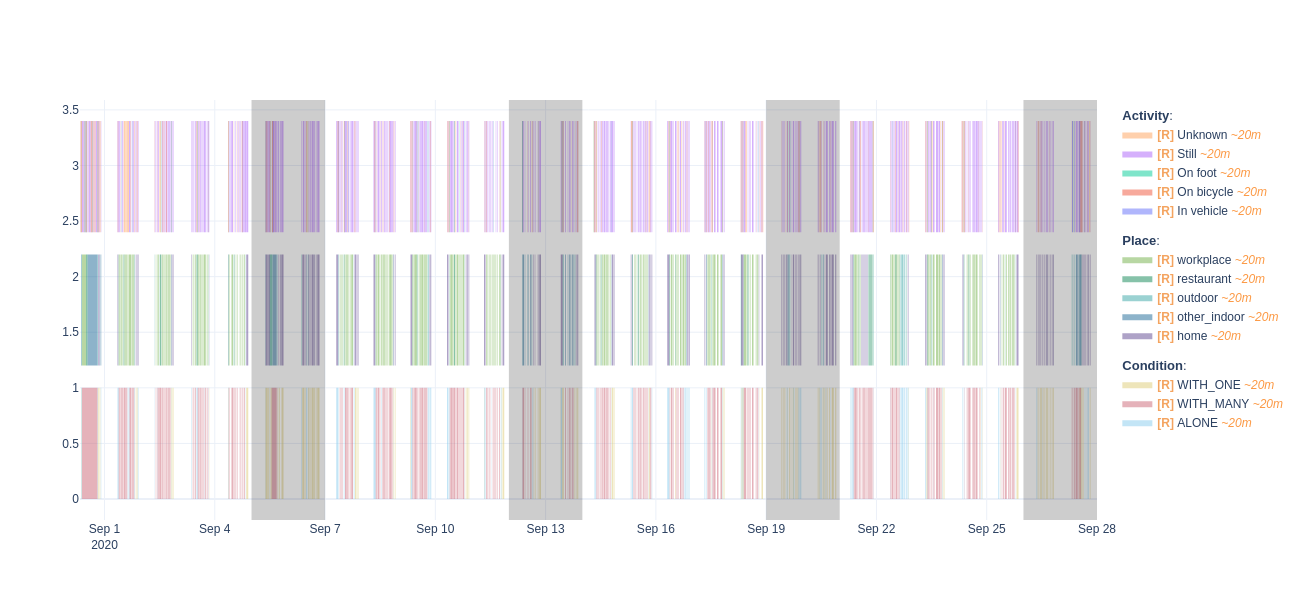

In [23]:
from code_utils.etri.visualization import add_etri_timeline_to_fig
from plotly.subplots import make_subplots
from plotly_resampler import FigureResampler

user = 'user05'
fr = FigureResampler(make_subplots(rows=1, cols=1), default_n_shown_samples=2000)

add_etri_timeline_to_fig(fr, df_label_tot[df_label_tot.user == user], row=1, col=1)

fr.update_layout(template='plotly_white').show(renderer='png', width=1300, height=600)


In [246]:
# --- LEGACY CODE --- #
# from plotly_resampler import FigureResampler
# from plotly_resampler.aggregation import NoGapHandler, EveryNthPoint
# import matplotlib.colors as mcolors
# from itertools import cycle
# import plotly.graph_objects as go
# import plotly.express as px
# import numpy as np

# user = "user02"

# fr = FigureResampler(default_downsampler=EveryNthPoint())
# df_label_usr = df_label_tot.query(f"user == '{user}'").drop_duplicates(subset='timestamp').set_index("timestamp")
# df_label_usr = df_label_usr.reindex(pd.date_range(df_label_usr.index[0], df_label_usr.index[-1], freq='1min'))

# cols_to_plot = ["action", "place", 'activity', 'condition'][1:]

# for i, col in enumerate(cols_to_plot):
#     s = df_label_usr[col]
#     color_cycle = cycle(px.colors.qualitative.Plotly)
#     for k in s.cat.categories:
#         c = next(color_cycle)
#         c_a ="rgba(" + ", ".join([str(int(255 * c_)) for c_ in list(mcolors.to_rgb(c))]) + ", 0.5)"
#         fr.add_trace(
#             go.Scatter(
#                 name=k,
#                 stackgroup="one",
#                 mode='lines',
#                 line_color=c_a,
#                 fillcolor=c_a,
#                 legendgroup=f"group_{col}_s",
#                 hoveron='fills+points',
#                 hoverinfo="name",
#                 text=k,
#                 line_shape="hvh",
#                 line_width=.5,
#             ),
#             check_nans=False,
#             hf_x=df_label_usr.index,
#             hf_y=(s == k).astype(float),
#         )

#     fr.add_trace(
#         go.Scatter(
#             stackgroup="one",
#             name="buffer",
#             showlegend=False,
#             hoverinfo='skip',
#             fillcolor='rgba(0, 0, 0, .05)',
#             line_color='rgba(0, 0, 0, .05)',
#             legendgroup=f"group_{col}_s",
#             line_shape="hvh",
#             line_width=0,
#             opacity=1,
#         ),
#         hf_x=df_label_usr.index,
#         hf_y=0.2 * np.ones(len(df_label_usr)) + df_label_usr[col].isna().astype(int),
#     )

# fr.update_layout(height=500, template='plotly_white') 
